In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x1 = np.sin(np.random.randn(1, 40)) * 2 + 5
x2 = np.cos(np.random.randn(1, 40)) * -2.5 + 3
x3 = np.tan(np.random.randn(1, 40)) * 1.0 - 1
data = np.r_[x1, x2, x3]

plt.plot(data.T, ".")
plt.show()

<Figure size 640x480 with 1 Axes>

C:\Users\tsk_sato\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


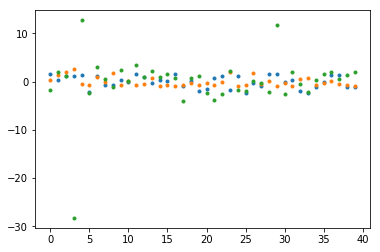

In [4]:
X = data.T
from sklearn import preprocessing
ss = preprocessing.StandardScaler(with_std=False)
X_zeromeans = ss.fit_transform(X)
plt.plot(X_zeromeans, ".")
plt.show()

In [5]:
X_diff = X_zeromeans[1:,:]-X_zeromeans[:-1,]

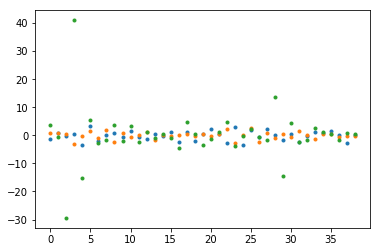

In [6]:
plt.plot(X_diff, ".")
plt.show()

In [7]:
C = X_zeromeans.T @ X_zeromeans / 40
L = np.linalg.cholesky(C)

In [8]:
L.T@(C@L)

array([[   9.87174906,  -34.36851726,   77.45680658],
       [ -34.36851726,  158.56484932, -355.71480572],
       [  77.45680658, -355.71480572,  801.35703841]])

In [37]:
C = np.array([[10,2],[2,4]])
L = np.linalg.cholesky(C)

In [42]:
# Cholesky分解して左右から逆行列をかける
np.linalg.inv(L)@C@np.linalg.inv(L.T)

array([[ 1.,  0.],
       [ 0.,  1.]])

In [28]:
eig_val, eig_mat = np.linalg.eig(C)

In [34]:
np.diag(1/np.sqrt(eig_val))@eig_mat.T@C@eig_mat@np.diag(1/np.sqrt(eig_val))

array([[  1.00000000e+00,  -6.02595110e-17],
       [  6.81826068e-17,   1.00000000e+00]])

In [18]:
eig_val

array([ 10.60555128,   3.39444872])

In [20]:
np.sqrt(eig_val)

array([ 3.25661654,  1.84240298])

In [21]:
L

array([[ 3.16227766,  0.        ],
       [ 0.63245553,  1.8973666 ]])

In [25]:
eig_mat@np.diag(np.sqrt(eig_val))

array([[ 3.11688172, -0.53389918],
       [ 0.94371585,  1.7633492 ]])

In [24]:
eig_mat

array([[ 0.95709203, -0.28978415],
       [ 0.28978415,  0.95709203]])

In [31]:
np.diag(np.sqrt(eig_val))@np.diag(np.sqrt(eig_val))

array([[ 10.60555128,   0.        ],
       [  0.        ,   3.39444872]])